<a href="https://colab.research.google.com/github/wafiesa/Iris/blob/main/Spark_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Top 10 rows of iris:
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}
Best Accuracy: 0.975
Accuracy of the model: 0.9666666666666667
Precision of the model: 0.9714285714285714
Recall of the model: 0.9666666666666667
F1-score of the model: 0.9672820512820512
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


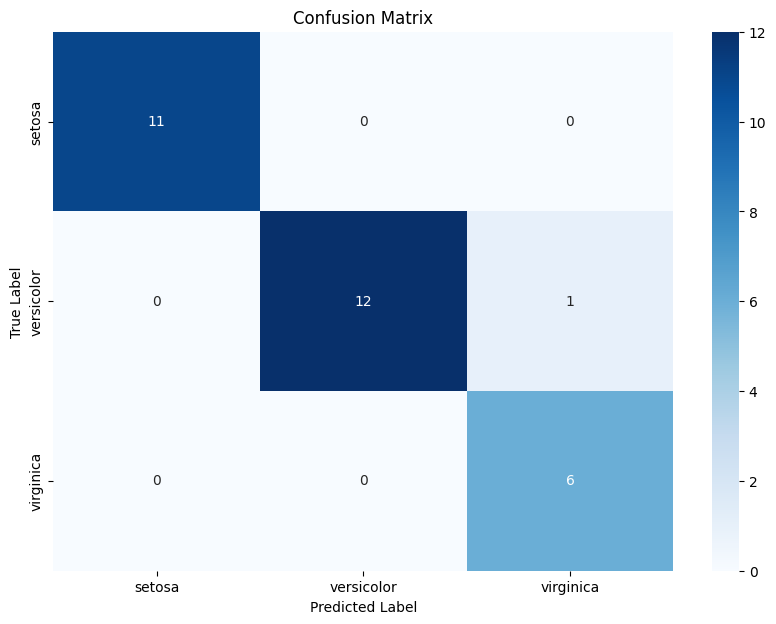

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Spark_Iris/iris.csv")

# Convert the Spark DataFrame to a pandas DataFrame
iris_df = iris

# Print top 10 rows
print("Top 10 rows of iris:")
iris_df.head(10)

# Convert the Species column to a numerical format
iris_df['Species'] = pd.factorize(iris_df['Species'])[0]

# Split features and target variable
X = iris_df.drop(['Species'], axis=1)
y = iris_df['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# Create a Random Forest classifier
RFC = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(RFC, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Make predictions with the best estimator
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Evaluate the performance of the model using various metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print("Accuracy of the model:", accuracy)
print("Precision of the model:", precision)
print("Recall of the model:", recall)
print("F1-score of the model:", f1_score)

# Print the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Transform to df for easier plotting
cm_df = pd.DataFrame(conf_matrix,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
